# Coding Challenge

## Loading the Packages and Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier 
from sklearn import metrics
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import pydotplus
%matplotlib inline

df = pd.read_csv("Data.csv")

## Data Exploration before Pre-Processing

### Data Dictionary 

1. Status = credit Status - "good", "bad"
2. Home	 = type of Home ownership - "rent", "owner", "priv", "ignore", "parents", "other"
3. Time	 = time of requested loan
4. Age	= client's age
5. Expense = amount of expenses
6. Income = amount of income
7. Debt = amount of debt
8. Amount = amount of requested of loan
9. Price = price of good

The Data has 8 Feature independent variables and the Target variable is "Status". The goal of the assesment is to check if the person is a default or not a default.

### Summarizing  the data

In [2]:
print("The first 5 rows of the Dataset:")
print(" ")
print(df.head())
print(" ")
print("The variable description of the dataset:")
print(" ")
print(df.info())
print(" ")
print("The Shape/Dimension of the data:")
print(df.shape)

The first 5 rows of the Dataset:
 
   Status  Home  Time  Age  Expenses  Income Debt Amount     Price
0       1     1    60   30        73     129    0    800       846
1       1     1    60   58        48     131    0   1000  1,658.00
2       2     2    36   46        90     200    0   2000  2,985.00
3       1     1    60   24        63     182    0    900  1,325.00
4       1     1    36   26        46     107    0    310       910
 
The variable description of the dataset:
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4417 entries, 0 to 4416
Data columns (total 9 columns):
Status      4417 non-null int64
Home        4417 non-null int64
Time        4417 non-null int64
Age         4417 non-null int64
Expenses    4417 non-null int64
Income      4417 non-null int64
Debt        4417 non-null object
Amount      4417 non-null object
Price       4417 non-null object
dtypes: int64(6), object(3)
memory usage: 310.6+ KB
None
 
The Shape/Dimension of the data:
(4417, 9)


### Null Values test

In [3]:
df.isnull().values.any()

False

After exploring the data and its variable's data types it can be inferred that Debt, Amount, Price should be numeric data type rather than the object data type. These 3 variables require preprocessing with removing the comma in there values and changing its data type to float values for accuracy. Further as per the "Null Values Test" and info() summary above the dataset has no missing values.

This is a classification problem. For comuptational purposes and convenience the target column is altered with value 1 as 0(good credit status) and 2 as 1(bad credit status).

Lastly, Home being a categorical variable is encoding as dummy variable.

## Data Pre-Processing

In [4]:
### Removing all the commas from the values and converting them into float values 
df["Debt"] = df["Debt"].str.replace(",","").astype(float)
df["Amount"] = df["Amount"].str.replace(",","").astype(float)
df["Price"] = df["Price"].str.replace(",","").astype(float)

In [5]:
### Altering the target column with value 1 as 0 and 2 as 1
df.Status = df.Status.replace(1,0)
df.Status = df.Status.replace(2,1)

In [6]:
#### Home being the categorical variable creating dummy variable of the Home feature
dummy = pd.get_dummies(df['Home'])
dummy.columns = ["Rent", "Owner", "Priv", "Ignore", "Parents", "Other"]
df = pd.concat([df,dummy], axis = 1)
del df['Home']
df.head()

,Status,Time,Age,Expenses,Income,Debt,Amount,Price,Rent,Owner,Priv,Ignore,Parents,Other
0,0,60,30,73,129,0.0,800.0,846.0,1,0,0,0,0,0
1,0,60,58,48,131,0.0,1000.0,1658.0,1,0,0,0,0,0
2,1,36,46,90,200,0.0,2000.0,2985.0,0,1,0,0,0,0
3,0,60,24,63,182,0.0,900.0,1325.0,1,0,0,0,0,0
4,0,36,26,46,107,0.0,310.0,910.0,1,0,0,0,0,0


## Data After Pre-Processing

In [7]:
print("The first 5 rows of the Dataset:")
print(" ")
print(df.head())
print(" ")
print("The variable description of the dataset:")
print(" ")
print(df.info())
print(" ")
print("The Shape/Dimension of the data:")
print(df.shape)

The first 5 rows of the Dataset:
 
   Status  Time  Age  Expenses  Income  Debt  Amount   Price  Rent  Owner  \
0       0    60   30        73     129   0.0   800.0   846.0     1      0   
1       0    60   58        48     131   0.0  1000.0  1658.0     1      0   
2       1    36   46        90     200   0.0  2000.0  2985.0     0      1   
3       0    60   24        63     182   0.0   900.0  1325.0     1      0   
4       0    36   26        46     107   0.0   310.0   910.0     1      0   

   Priv  Ignore  Parents  Other  
0     0       0        0      0  
1     0       0        0      0  
2     0       0        0      0  
3     0       0        0      0  
4     0       0        0      0  
 
The variable description of the dataset:
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4417 entries, 0 to 4416
Data columns (total 14 columns):
Status      4417 non-null int64
Time        4417 non-null int64
Age         4417 non-null int64
Expenses    4417 non-null int64
Income      4417 n

## Data Exploration Before Building Machine Learning Models

In [8]:
df.Status.value_counts()

0    3184
1    1233
Name: Status, dtype: int64

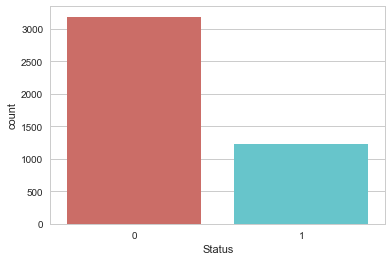

In [9]:
plt.rc("font", size=14)
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
sns.countplot(x = 'Status', data = df, palette='hls')
plt.show()

By exploring the target variable, it can be observed that the data is imbalanced.

In [10]:
df.groupby("Status").mean()

,Time,Age,Expenses,Income,Debt,Amount,Price,Rent,Owner,Priv,Ignore,Parents,Other
Status,,,,,,,,,,,,,
0,45.540829,37.737751,55.223618,141.779837,335.524497,992.421796,1458.162374,0.182789,0.537060,0.050565,0.003455,0.171796,0.054334
1,48.895377,35.363341,56.453366,101.569343,349.029197,1156.024331,1470.084347,0.312247,0.308191,0.067315,0.007299,0.186537,0.118410


With the help of finding the average of each feature grouped by the credit status helps to give an overview on which feature create impact on the credit status.

For Example, one  of the insight is: The People with Bad Credit Status tend to have more average amount of loan requested with lower average income and they have more probability of having a Rent House

Text(0,0.5,'Frequency')

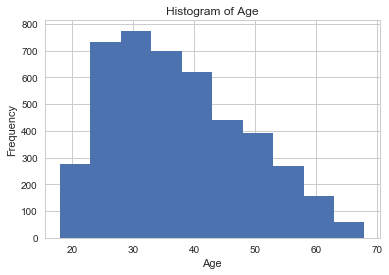

In [11]:
df.Age.hist()
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

Most of the people in this pool of data are from the age group 25 to 45. The data is Right skewed with respect to Age 

## Balancing and Splitting Data

Separating the Target Variable (y) from the Independent Features (x)

In [12]:
x = df.loc[:, df.columns != 'Status']
y = df.loc[:, df.columns == 'Status']

Splitting the Features and the target into training and testing dataset. The Training and Testing set is splitted in the Ratio of 80:20.

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

Balancing the dataset by using Over Sampling. 

In [14]:
os = SMOTE(random_state=0)
columns = x_train.columns
os_x_train,os_y_train=os.fit_sample(x_train, y_train)
os_x_train = pd.DataFrame(data=os_x_train,columns=columns )
os_y_train= pd.DataFrame(data=os_y_train,columns=['Status'])

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


After Balancing the dataset the structure description of the dataset is given below.

In [15]:
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_x_train))
print("Number of Good Credit status in oversampled data",len(os_y_train[os_y_train['Status']==0]))
print("Number of Bad Credit status",len(os_y_train[os_y_train['Status']==1]))
print("Proportion of Good Credit status data in oversampled data is ",len(os_y_train[os_y_train['Status']==0])/len(os_x_train))
print("Proportion of Bad Credit status data in oversampled data is ",len(os_y_train[os_y_train['Status']==1])/len(os_x_train))

length of oversampled data is  5106
Number of Good Credit status in oversampled data 2553
Number of Bad Credit status 2553
Proportion of Good Credit status data in oversampled data is  0.5
Proportion of Bad Credit status data in oversampled data is  0.5


### This Assesment with follow Supervised Learning. Since the target Variable is a Classfication into Good or a Bad Credit. This is a Classification problem. Thus we will use two sueprvised learning classification machine algorithms for predictive analysis.

## 1. Logistic Regression

Training the Logistic Regression Model on the Training dataset using all the feature varibles.

In [16]:
model_lg = LogisticRegression()
model_lg.fit(os_x_train,os_y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Predicting the target values using the test set and the  logistic regression model built above.

In [17]:
y_pred_lg=model_lg.predict(x_test)

Developing a confusion matrix to look into the performance of the classification model on the set of test dataset.

The Confusion Matrix for Logistic Regression Model is:
[[423 208]
 [ 76 177]]
 
The Graphical Representation of Confusion Matrix is:


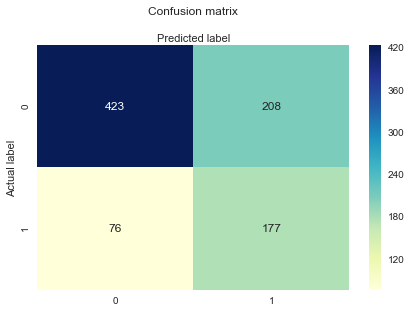

In [18]:
CFM_lg = metrics.confusion_matrix(y_test, y_pred_lg)
print("The Confusion Matrix for Logistic Regression Model is:")
print(CFM_lg)
print(" ")

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(CFM_lg), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
print("The Graphical Representation of Confusion Matrix is:")

In [19]:
print("Performance Evaluation of Logistic Regression:")
print(" ")
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_lg))
print("Precision:",metrics.precision_score(y_test, y_pred_lg))
print("Recall:",metrics.recall_score(y_test, y_pred_lg))
print("False Negative Rate:", CFM_lg[1,0]/(CFM_lg[1,0]+CFM_lg[1,1]))

Performance Evaluation of Logistic Regression:
 
Accuracy: 0.6787330316742082
Precision: 0.4597402597402597
Recall: 0.6996047430830039
False Negative Rate: 0.30039525691699603


#### Developing the ROC curve and calculating the Area Under the Curve

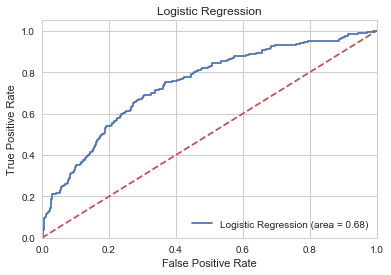

In [20]:
logit_roc_auc = roc_auc_score(y_test, model_lg.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, model_lg.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression')
plt.legend(loc="lower right")
plt.show()

## 2. Decision Tree (Gini Index)

Training the Decision Tree Model using Gini Index on the Training dataset using all the feature varibles.

In [21]:
model_gini = DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=3, min_samples_leaf=5) 
model_gini.fit(os_x_train, os_y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

Predicting the target values using the test set and the Decision Tree Model using Gini Index built above.

In [22]:
y_pred_gini = model_gini.predict(x_test) 

Developing a confusion matrix to look into the performance of the classification model on the set of test dataset.

The Confusion Matrix for Logistic Regression Model is:
[[509 122]
 [121 132]]
 
The Graphical Representation of Confusion Matrix is:


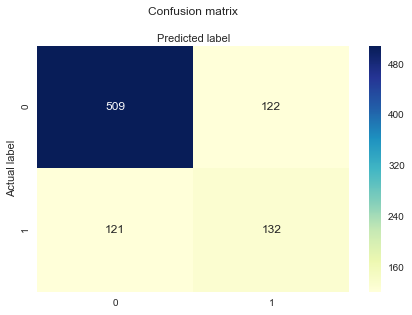

In [23]:
CFM_gini = metrics.confusion_matrix(y_test, y_pred_gini)
print("The Confusion Matrix for Logistic Regression Model is:")
print(CFM_gini)
print(" ")

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(CFM_gini), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
print("The Graphical Representation of Confusion Matrix is:")

Creating the Graphical view of the Decision Tree Model build by using Gini Index.

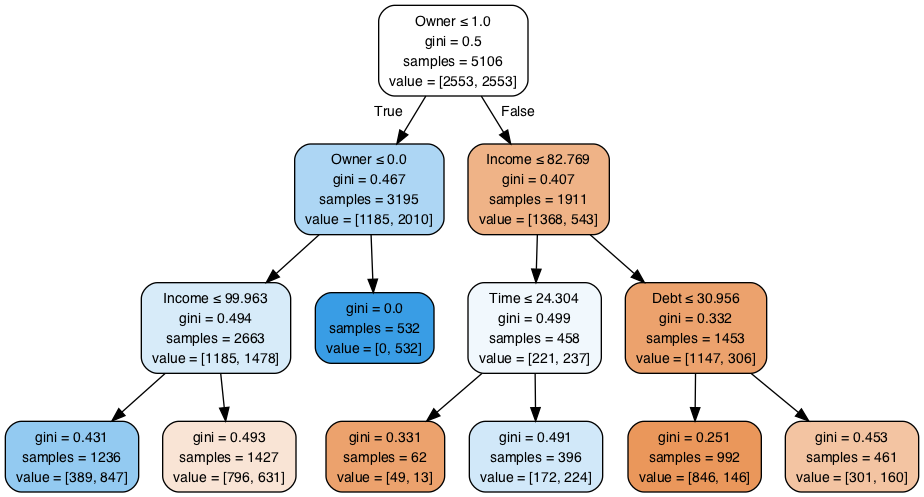

In [24]:
x_col = list(x.columns.values)
dot_data = StringIO()
export_graphviz(model_gini, out_file=dot_data, feature_names = x_col,
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [25]:
print("Performance Evaluation of Decision Tree Model using Gini Index:")
print(" ")
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_gini))
print("Precision:",metrics.precision_score(y_test, y_pred_gini))
print("Recall:",metrics.recall_score(y_test, y_pred_gini))
print("False Negative Rate:", CFM_gini[1,0]/(CFM_gini[1,0]+CFM_gini[1,1]))

Performance Evaluation of Decision Tree Model using Gini Index:
 
Accuracy: 0.7251131221719457
Precision: 0.5196850393700787
Recall: 0.5217391304347826
False Negative Rate: 0.4782608695652174


#### Developing the ROC curve and calculating the Area Under the Curve

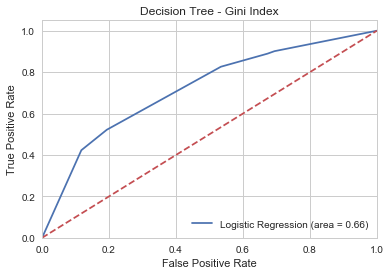

In [26]:
logit_roc_auc = roc_auc_score(y_test, model_gini.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, model_gini.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree - Gini Index')
plt.legend(loc="lower right")
plt.show()

## 2. Decision Tree (Entropy)

Training the Decision Tree Model using Entropy on the Training dataset using all the feature varibles.

In [27]:
model_entropy = DecisionTreeClassifier( 
            criterion = "entropy", random_state = 100, 
            max_depth = 3, min_samples_leaf = 5) 
  
    # Performing training 
model_entropy.fit(os_x_train, os_y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

Predicting the target values using the test set and the Decision Tree Model using Entropy built above.

In [28]:
y_pred_entropy = model_entropy.predict(x_test)

Developing a confusion matrix to look into the performance of the classification model on the set of test dataset.

The Confusion Matrix for Logistic Regression Model is:
[[537  94]
 [135 118]]
 
The Graphical Representation of Confusion Matrix is:


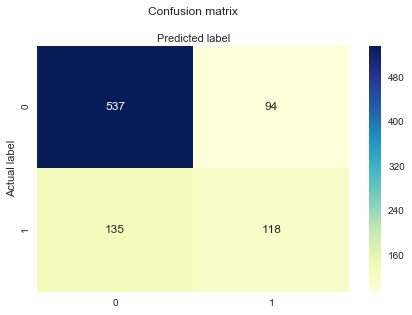

In [29]:
CFM_entropy = metrics.confusion_matrix(y_test, y_pred_entropy)
print("The Confusion Matrix for Logistic Regression Model is:")
print(CFM_entropy)
print(" ")

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(CFM_entropy), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
print("The Graphical Representation of Confusion Matrix is:")

Creating the Graphical view of the Decision Tree Model build by using Gini Index.

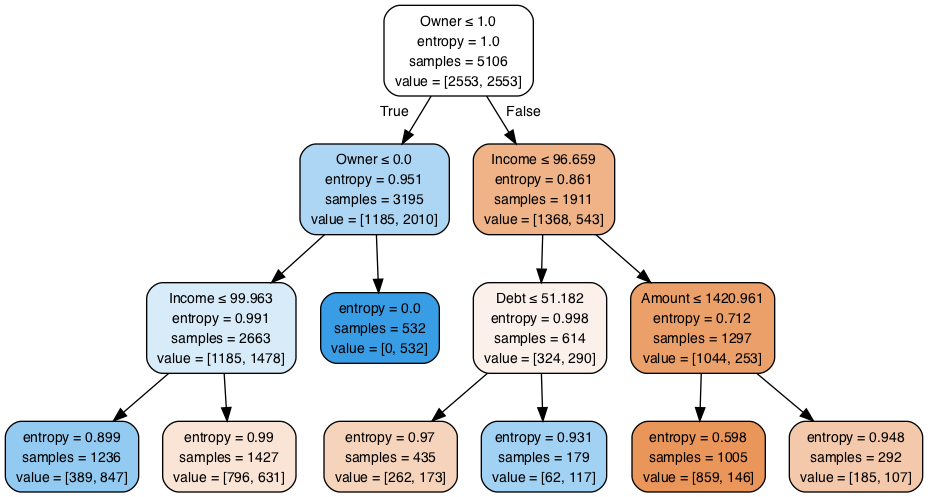

In [30]:
x_col = list(x.columns.values)
dot_data = StringIO()
export_graphviz(model_entropy, out_file=dot_data,feature_names=x_col, 
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [31]:
print("Performance Evaluation of Decision Tree Model using Entropy:")
print(" ")
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_entropy))
print("Precision:",metrics.precision_score(y_test, y_pred_entropy))
print("Recall:",metrics.recall_score(y_test, y_pred_entropy))
print("False Negative Rate:", CFM_entropy[1,0]/(CFM_entropy[1,0]+CFM_entropy[1,1]))

Performance Evaluation of Decision Tree Model using Entropy:
 
Accuracy: 0.7409502262443439
Precision: 0.5566037735849056
Recall: 0.466403162055336
False Negative Rate: 0.5335968379446641


#### Developing the ROC curve and calculating the Area Under the Curve

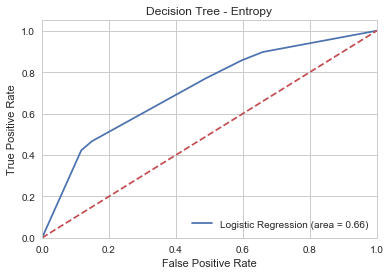

In [32]:
logit_roc_auc = roc_auc_score(y_test, model_entropy.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, model_entropy.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree - Entropy')
plt.legend(loc="lower right")
plt.show()

On Evaluating the Model's Confusion Matrix and the context of the data, the interest is to predict correctly who were the defaults. The problem would arise when the model predicts it as not a default and it actually turns out to be a default. Thus, the error type False Negative can have the most bad impact with business perspective and it needs to be low, that is False Negative Rate needs to be low of the model.

On the other hand, it is the True Negative Rate which needs to high showing that the model predicted most of the defaults which were actually defaults. That is the Performance Metric Recall of the Model should be high.

From the Above two models, it is understood that the Logistic Regression works better with High Recall and Low False Negative Rate for predictive analysis.